<a href="https://colab.research.google.com/github/LucasMelvin15/Pytorch_deeplearning/blob/main/03_PyTorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.Computer vision libraries

`Torch.vision`

`torch.datasets`

`torchvision.models`

`torchvision.transforms`

In [1]:
#Import Pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


## 1. Getting a dataset

The dataset we're going to be using is FashionMNIST from Torchvision.


In [2]:
#set up training data
train_data = datasets.FashionMNIST(
    root= "data", #where to download data to
    train = True, #do we want the trainind data
    download = True, # do we want to download the data
    transform = torchvision.transforms.ToTensor(), #how do we want to transform the data to tensors
    target_transform = None #how do we want to transform the data

)
test_data = datasets.FashionMNIST(
    root = "data",
    train= False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13491633.45it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 279336.97it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5596383.37it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1203113.44it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
#see the first training example

image, label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## 1.1 Checking input and output shapes

In [7]:
#check the shape
print(f"image shape: {image.shape} ->[color channels, height, width]")
print(f"Image label: {class_names[label]}")


image shape: torch.Size([1, 28, 28]) ->[color channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image.shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

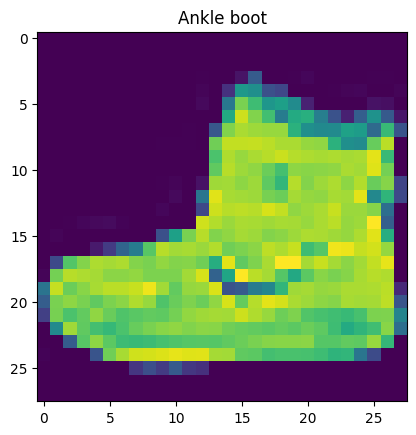

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image.shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])


(-0.5, 27.5, 27.5, -0.5)

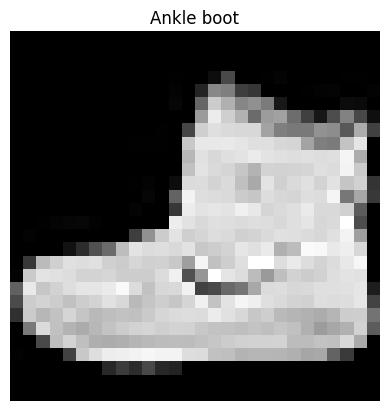

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)



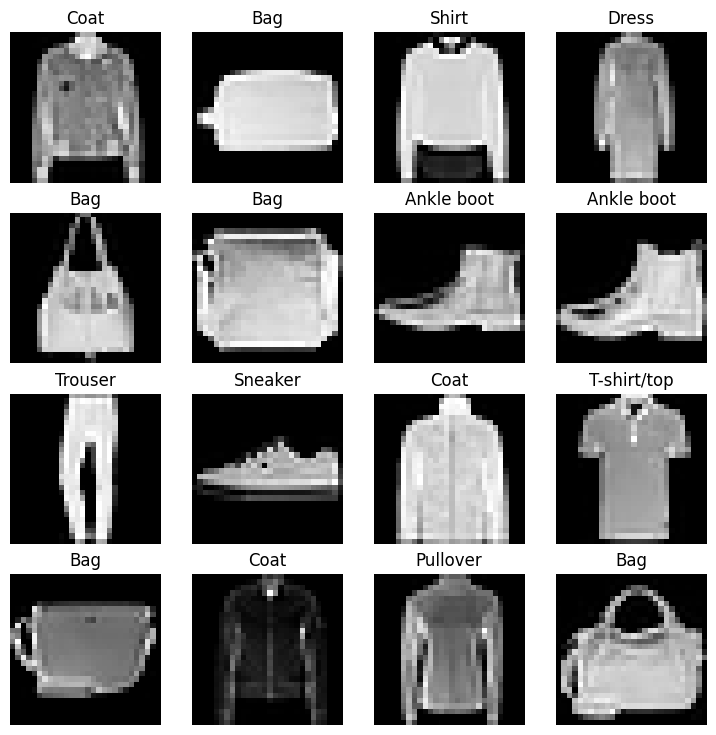

In [10]:
#plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows * cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


## 2.Prepare a DataLoader
As of now, our data is in form of pytorch dataset.

DataLoader turns our dataset into a python iterable.

More specifically turn the data into batches(mini-batches) ie looking at 32 images at a time so batch size of 32
importance
1. More computationally efficient
2. Gives our neural network more chances to update its gradients per epoch


In [11]:
from torch.utils.data import DataLoader

#set the batchsize hyper parameter
BATCH_SIZE = 32

#turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79adf11dd690>,
 <torch.utils.data.dataloader.DataLoader at 0x79adf11de080>)

In [12]:
#lets check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"length of train dataloader: {len(train_dataloader)} batches of: {BATCH_SIZE}")
print(f"length of test dataloader: {len(test_dataloader)} and batches of: {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79adf11dd690>, <torch.utils.data.dataloader.DataLoader object at 0x79adf11de080>)
length of train dataloader: 1875 batches of: 32
length of test dataloader: 313 and batches of: 32


In [13]:
# check out whats inside the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape


#train_features_batch  - the images themselves turn into iterables then call the next batch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
label: 8, label size: <built-in method size of Tensor object at 0x79adf7f09440>


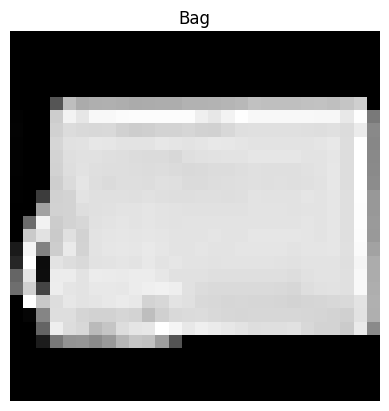

In [14]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"label: {label}, label size: {label.size}")

## 3. Model 0: Build a baseline model
A baseline model is a simple model that you'll improve over time

In [15]:
#create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x= train_features_batch[0]

#flatten the sample
output = flatten_model(x) #this will perform a forward pass
print(f"shape before flattening: {x.shape} -> [color channels, height, width]")
print(f"shape after flattening: {output.shape} ->[color channels, height*width]")

#nn.flatten flattens out our model into a single vector space

shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
shape after flattening: torch.Size([1, 784]) ->[color channels, height*width]


In [16]:
from torch import nn
class FashionMnistModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features= hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
      return self.layer_stack(x)




In [17]:
torch.manual_seed(42)

#set up model with input parameters
model_0 = FashionMnistModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMnistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,28,28])
model_0(dummy_x).shape


torch.Size([1, 10])

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Set up loss, optimizer and evaluation metrics

* Loss function - multi-class data loss function will be `nn.CrossEntropyLoss()`
*Optimizer = `torch.optim.SGD`
*Evaluation metric - Accuracy

In [20]:
#claculate the accuracy

import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [21]:
#import accuracy metric
from helper_functions import accuracy_fn

#set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#the model's optimizer will update a model's parameters once per batch rather than once per epoch

### 3.2 Creating a function to time our experiment

Things to track

1. A model's performance (loss and accuracy values etc)
2. How fast the model runs ie on the gpu or cpu

In [22]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """prints difference between end and start time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time: 3f} seconds")
  return total_time


In [23]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu:  0.000053 seconds


5.261399999767491e-05

### 3.3 Create a training loop and training a model on batches of data
1. Loop thru epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out whats happening
5. Time it all

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y_test) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu:  84.812010 seconds


## 4. Make predictions and get Model 0 results

In [25]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #make predictions
      y_pred = model(X)

      #accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))

    #scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

#calculate model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using a gpu if available)

In [26]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [27]:
import torch
torch.cuda.is_available()

False

In [28]:
#set up device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Build a better module with non-linearity

In [29]:

class FashionMnistModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):

        return self.layer_stack(x)

In [30]:
#instanciate the model

model_1 = FashionMnistModelV1(
     input_shape=784,
     hidden_units=10,
     output_shape=len(class_names)
).to(device)

model_1

FashionMnistModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [31]:
dummy_x = torch.rand([1,28,28]).to(device)
model_1(dummy_x).shape

torch.Size([1, 10])

### 6.1 Set up a loss function and optimizer

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionalizing training and evaluation/testing loops

Lets create a function for:

* Training loop - `train-step()`

* testing loop - `test_step()`

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training step with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  #put model into training mode
  model.train()
    # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(data_loader):

        #put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


    # Divide total train loss and accuracy by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [34]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """performs a testing step with the model trying to learn on data_loader"""

   # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0

  #put model into testing mode
  model_0.eval()

 #turn on inference mode context manager
  with torch.inference_mode():
        for X, y in test_dataloader:
          #put data into the target device
          X, y = X.to(device), y.to(device)
          # 1. Forward pass
          test_pred = model(X)

          # 2. Calculate loss (accumatively)
          test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

          # 3. Calculate accuracy (preds need to be same as y_true)
          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss and test acc by length of test dataloader (per batch)
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [35]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#set epochs
epochs = 3

#create an optimization nad evaluation lopp using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                            device=device,)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.11456 | Train acc: 58.46%
Test loss: 0.96320 | Test acc: 63.41%

Epoch: 1
-----
Train loss: 0.90905 | Train acc: 64.87%
Test loss: 0.74544 | Test acc: 72.61%

Epoch: 2
-----
Train loss: 0.59506 | Train acc: 78.26%
Test loss: 0.49534 | Test acc: 82.68%

Train time on cpu:  47.164941 seconds


In [36]:
#get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistModelV1',
 'model_loss': 0.495336651802063,
 'model_acc': 82.67771565495208}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

In [37]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  """
  Model Architecture that replicates the TinyVGG model from the CNN Explainer website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      #print(f"output shape of conv_1 layer: {x.shape}")
      x = self.conv_block_2(x)
      #print(f"output shape of conv_2 layer: {x.shape}")
      x = self.classifier(x)
      #print(f"output shape of classifier layer: {x.shape}")
      return x

In [38]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [39]:
rand_image_tensor = torch.randn(size=[1,28,28])
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [40]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

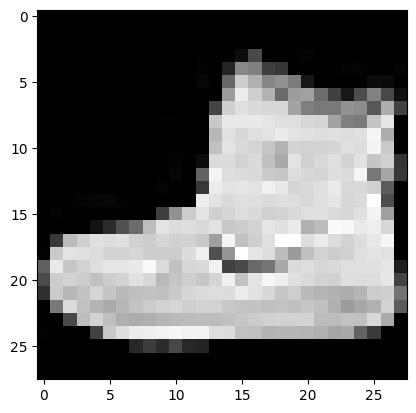

In [41]:
plt.imshow(image.squeeze(),cmap="gray")

### 7.1 Stepping through `nn.Conv2d()`

In [42]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f" Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
 Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [43]:
test_image.shape

torch.Size([3, 64, 64])

In [44]:
#create a single conv2d layer

conv_layer= nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0)

#pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape



torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [45]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [46]:
#print out original image shape
print(f"test image original shape: {test_image.shape}")
#create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data through the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"shape after going through the conv layer: {test_image_through_conv.shape}")

#pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through the conv and max pool layer: {test_image_through_conv_and_max_pool.shape}")


test image original shape: torch.Size([3, 64, 64])
shape after going through the conv layer: torch.Size([10, 62, 62])
shape after going through the conv and max pool layer: torch.Size([10, 31, 31])


In [47]:
torch.manual_seed(42)

#create a random tensor with similar dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"random tensor\n:{random_tensor}")
#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass the random tensor through the max pool layer
random_tensor_thru_max_pool_layer = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n {random_tensor_thru_max_pool_layer}")
print(f"Max pool tensor shape: {random_tensor_thru_max_pool_layer.shape}")


random tensor
:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Set up a loss function and optimizer for `model_2`

In [48]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Create a training and testing loop

In [49]:
#set a manual seed
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#set the number of epochs
epochs = 3

#create an optimization and evaluation loop using test_step and train_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  train_time_end_on_gpu = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500 | Test acc: 85.99%

Train time on cpu:  80.389977 seconds
Epoch: 1
-----
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244 | Test acc: 86.91%

Train time on cpu:  161.585346 seconds
Epoch: 2
-----
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719 | Test acc: 88.07%

Train time on cpu:  230.870999 seconds


In [50]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [51]:
model_0_results

{'model_name': 'FashionMnistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [52]:
model_1_results

{'model_name': 'FashionMnistModelV1',
 'model_loss': 0.495336651802063,
 'model_acc': 82.67771565495208}

## 8. Compare model results and training time

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMnistModelV0,0.476639,83.426518
1,FashionMnistModelV1,0.495337,82.677716
2,FashionMNISTModelV2,0.327190,88.069089


In [54]:
#add training time to the model comparison
compare_results["training_time"]=[total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMnistModelV0,0.476639,83.426518,84.812010
1,FashionMnistModelV1,0.495337,82.677716,47.164941
2,FashionMNISTModelV2,0.327190,88.069089,230.870999


Text(0, 0.5, 'model')

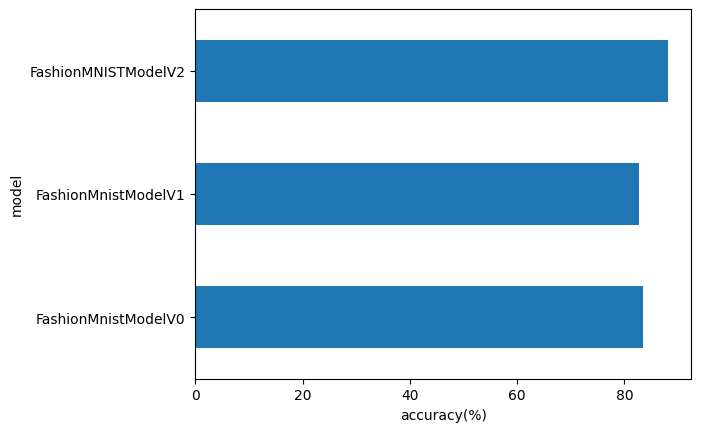

In [55]:
#visualize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [56]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs =[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add a batch dimension)
      sample = torch.unsqueeze(sample, dim=0)

      #forward pass as model outputs raw logits
      pred_logit = model(sample)

      #get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Append the prediction probability to the list
      pred_probs.append(pred_prob)

  #stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [57]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

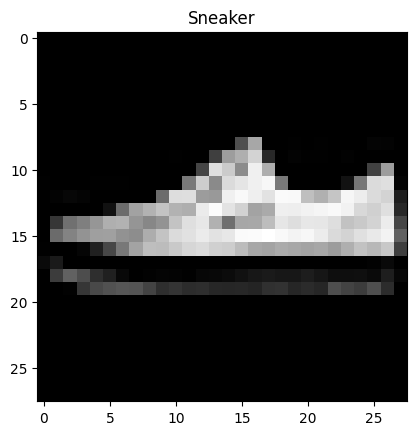

In [58]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [59]:
#make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[1.1143e-07, 1.6978e-07, 7.4044e-07, 2.8971e-05, 3.9901e-07, 1.3266e-03,
         3.0622e-08, 9.9858e-01, 4.0959e-05, 1.8954e-05],
        [1.9741e-06, 6.3328e-07, 7.8052e-07, 2.9365e-06, 4.0770e-07, 1.6612e-04,
         2.0287e-06, 3.1424e-03, 1.8765e-04, 9.9650e-01]])

In [60]:
#convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 9, 5, 9, 3, 1, 1, 4, 5])

In [61]:
test_labels

[7, 9, 5, 9, 3, 1, 1, 4, 5]

(-0.5, 27.5, 27.5, -0.5)

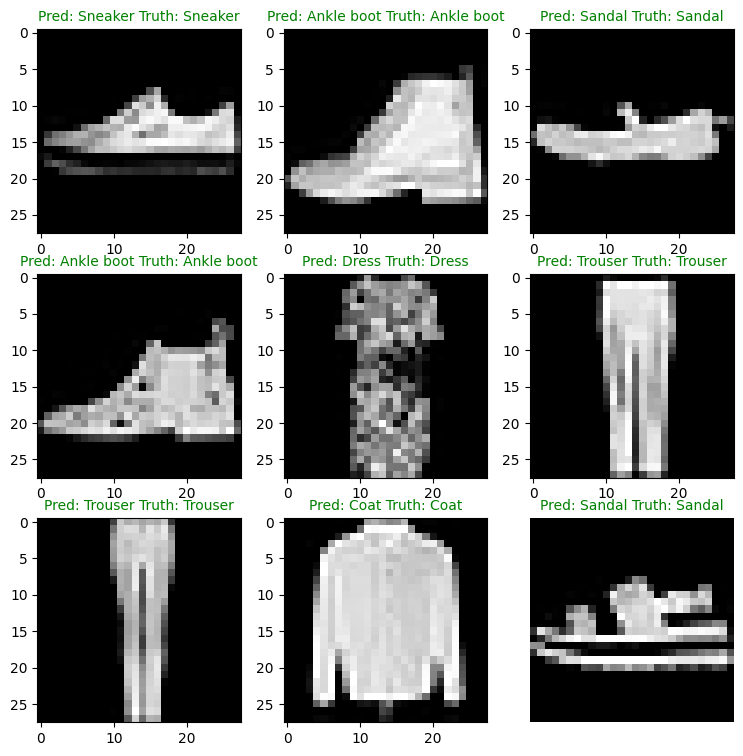

In [62]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i, sample in enumerate(test_samples):
  #create a subplot
  plt.subplot(nrows, ncols, i+1)

  #ploy the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  #find the predictions (in text form eg "sandal")
  pred_label = class_names[pred_classes[i]]

  #get the truth labels (in text form)
  truth_label = class_names[test_labels[i]]

  #create a title for the plot
  title_text = f"Pred: {pred_label} Truth: {truth_label}"

  #check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") #green if predictions is same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")


plt.axis(False)

## 10. Make a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix with `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mlextend.plotting.plot_confusion_matrix()`

In [63]:
#import tqdm.auto
from tqdm.auto import tqdm

#make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
   for X, y in tqdm(test_dataloader, desc="making predictions..."):
     # send data to the target device
      X,y = X.to(device) , y.to(device)
     # do the forward pass
      y_logit = model_2(X)
     # turn predictions from logits -> prediction probabilities -> prediction labels
      y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
     # put prediction on cpu for evaluation
      y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]






making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [64]:
len(y_pred_tensor)

10000

In [65]:
# see if required pacakages are installed and if not install them
try:
   import torchmetrics, mlxtend
   print(f"mlxtend version: {mlxtend.__version__}")
   assert int(mlxtend.__version__.split('.')[1] >= 19, "mlxtend version should be 0.19 or higher")
except:
      !pip install torchmetrics -U mlxtend
      import torchmetrics, mlxtend
      print(f"mlxtend version: {mlxtend.__version__}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [66]:
import mlxtend
print(mlxtend.__version__)

0.23.1


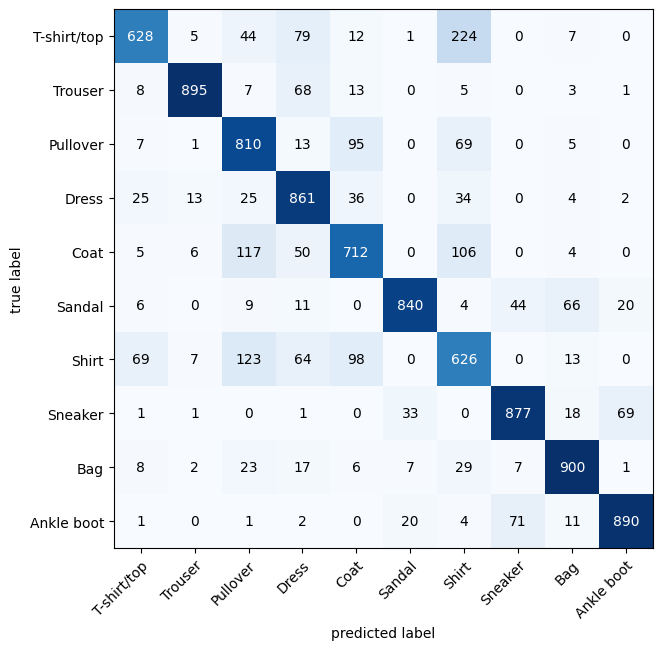

In [67]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#set up a confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load the best performing model

In [68]:
from pathlib import Path

#create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#create model save path
MODEL_NAME = '03_pytorch_computer_vision_FASHIONMNIST_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

#save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_FASHIONMNIST_model.pth


In [71]:
#load the state dict
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

#load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send model to an available gpu
loaded_model_2 = loaded_model_2.to(device)

In [72]:
#evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [73]:
#do they match with model_2 results
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}